In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.colors as colors
import plotly.express as px
import plotly.io as pio
from datetime import datetime
import seaborn as sns

In [2]:
data = pd.read_csv('UberDataset.csv', encoding = 'latin1')
df = data.copy()
df.sort_index()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
df.shape

(1156, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


# Data Processing

<h3>Converting Start_Date and End_Date columns data type to date_time.</h3></n>
<h3>Converting Category column data type from object to category.</h3>

In [6]:
def parse_date(date_str):
    try:
        if '-' in date_str:
            # Assume format is DD-MM-YYYY HH:MM
            return datetime.strptime(date_str, '%d-%m-%Y %H:%M')
        elif '/' in date_str:
            # Assume format is MM/DD/YYYY HH:MM
            return datetime.strptime(date_str, '%m/%d/%Y %H:%M')
    except:
       return pd.NaT

In [7]:
df["START_DATE"] = df["START_DATE"].apply(parse_date)
df["END_DATE"] = df["END_DATE"].apply(parse_date)
df["CATEGORY"] = df["CATEGORY"].astype("category")

In [8]:
df["START_DATE"] = df["START_DATE"].dt.strftime('%d-%m-%Y %H:%M')
df["END_DATE"] = df["END_DATE"].dt.strftime('%d-%m-%Y %H:%M')

In [9]:
df["START_DATE"] = pd.to_datetime(df["START_DATE"], format = "%d-%m-%Y %H:%M")
df["END_DATE"] = pd.to_datetime(df["END_DATE"], format = "%d-%m-%Y %H:%M")

<h3>Deleting last row of the dataset, because it is empty.</h3>

In [10]:
df.drop(index = 1155, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   category      
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: category(1), datetime64[ns](2), float64(1), object(3)
memory usage: 55.5+ KB


In [12]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [13]:
df['PURPOSE'].fillna('Not Defined', inplace = True)

C:\Users\rpit1\AppData\Local\Temp\ipykernel_41972\3025282810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna('Not Defined', inplace = True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   category      
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: category(1), datetime64[ns](2), float64(1), object(3)
memory usage: 55.5+ KB


In [15]:
df['Date'] = df['START_DATE'].dt.date
df['Time'] = df['START_DATE'].dt.hour
df['Start_date_month'] = df['START_DATE'].dt.month
df['Start_date_weekday'] = df['START_DATE'].dt.day_of_week

In [16]:
df['Day-Night'] = pd.cut(x = df['Time'],bins = [0,4,10,15,20,24], labels = ['Night','Morning','Afternoon','Evening','Night'], ordered = False)

In [17]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Start_date_month,Start_date_weekday,Day-Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,1,4,Night
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Defined,2016-02-01,1,2,0,Night
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-02-01,20,2,0,Evening
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-05-01,17,5,6,Evening
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-06-01,14,6,2,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,2016-12-31,1,12,5,Night
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016-12-31,13,12,5,Afternoon
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15,12,5,Afternoon
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21,12,5,Night


<h2> Data Visualization </h2>

<h3> Q.1 - In which category do people book the most Uber rides? </h3>

In [18]:
mcc = df.groupby(['CATEGORY'], as_index = False, observed = False)['START'].count()
mcc

,CATEGORY,START
0,Business,1078
1,Personal,77


In [19]:
trace = go.Bar(
    x = mcc['START'],
    y = mcc['CATEGORY'],
    orientation = 'h',
    marker = dict(color = 'cyan', line = dict(width = 2, color ='white')),
    text = mcc['START'],
    textfont = dict(size = 16, color = 'white'),
    textposition = 'outside',
    name = 'Category',
    hovertemplate = '%{x}<extra></extra>',
    showlegend = True
)
layout = go.Layout(
    title = dict(text = '<b>Uber rides Booked by Category<b><br><sup>BAR CHART</sup>', font = dict(size = 26, family = 'Arial', color = 'white'), x = 0.5),
    xaxis = dict(title = dict(text = 'Count', font = dict(color = 'whitesmoke', size = 20, family = 'Arial'))),
    yaxis = dict(title = dict(text = 'Category', font = dict(color = 'whitesmoke', size = 20, family = 'Arial'))),
    hovermode = 'y unified',
    template = 'plotly_dark',
    legend = dict(x = 0.85, y = 0.99, font = dict(size = 18)),
    width = 1100
)
fig = go.Figure(trace, layout)
fig.show()

<h3>Ans.1 - People booked the most Uber rides in Buisness Category.</h3>

<h3> Q.2 - For which purpose do people book Uber rides the most? </h3>

In [20]:
mpc = df.groupby(['PURPOSE'], as_index = False, observed = False)['CATEGORY'].count()
mpc

,PURPOSE,CATEGORY
0,Airport/Travel,3
1,Between Offices,18
2,Charity ($),1
3,Commute,1
4,Customer Visit,101
5,Errand/Supplies,128
6,Meal/Entertain,160
7,Meeting,187
8,Moving,4
9,Not Defined,502


In [21]:
trace = go.Bar(
    x = mpc['PURPOSE'],
    y = mpc['CATEGORY'],
    orientation = 'v',
    marker = dict(color = 'cyan', line = dict(width = 2, color ='white')),
    text = mcc['CATEGORY'],
    textfont = dict(size = 16, color = 'white'),
    textposition = 'outside',
    name = 'Purpose',
    hovertemplate = '%{y}<extra></extra>',
    showlegend = True
)
layout = go.Layout(
    title = dict(text = '<b>Uber rides Booked by Purpose<b><br><sup>BAR CHART</sup>', font = dict(size = 26, family = 'Arial', color = 'white'), x = 0.5),
    xaxis = dict(title = dict(text = 'PURPOSE', font = dict(color = 'whitesmoke', size = 20, family = 'Arial'))),
    yaxis = dict(title = dict(text = 'COUNT', font = dict(color = 'whitesmoke', size = 20, family = 'Arial'))),
    hovermode = 'x unified',
    template = 'plotly_dark',
    legend = dict(x = 0.05, y = 0.99, font = dict(size = 18)),
    width = 1100, height = 700
)
fig = go.Figure(trace, layout)
fig.show()

<h3>Ans.2 - People booked the most Uber rides for Not Defined purpose.</h3>

<h3> Q.3 - At what time do people book cabs the most from Uber? </h3>

In [22]:
mtc = df.groupby(['Day-Night'], as_index = False, observed = False)['CATEGORY'].count()
mtc

,Day-Night,CATEGORY
0,Afternoon,430
1,Evening,416
2,Morning,172
3,Night,118


In [23]:
trace = go.Bar(
    x = mtc['Day-Night'],
    y = mtc['CATEGORY'],
    orientation = 'v',
    marker = dict(color = 'cyan', line = dict(width = 2, color ='white')),
    text = mtc['CATEGORY'],
    textfont = dict(size = 16, color = 'white'),
    textposition = 'outside',
    name = 'Day-Night',
    hovertemplate = '%{y} Rides Booked<extra></extra>',
    showlegend = True
)
layout = go.Layout(
    title = dict(text = '<b>Uber rides Booked between Day - Night<b><br><sup>BAR CHART</sup>', font = dict(size = 26, family = 'Arial', color = 'white'), x = 0.5),
    xaxis = dict(title = dict(text = 'Day - Night', font = dict(color = 'whitesmoke', size = 20, family = 'Arial'))),
    yaxis = dict(title = dict(text = 'COUNT', font = dict(color = 'whitesmoke', size = 20, family = 'Arial'))),
    hovermode = 'x unified',
    template = 'plotly_dark',
    legend = dict(x = 0.85, y = 0.99, font = dict(size = 18)),
    width = 1100, height = 700
)
fig = go.Figure(trace, layout)
fig.show()

<h3>Ans.3 - People booked the most Uber rides in afternoon and evening.</h3>

<h3> Q.4 - In which months do people book Uber rides less frequently? </h3>

In [24]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Start_date_month,Start_date_weekday,Day-Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,1,4,Night
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Defined,2016-02-01,1,2,0,Night
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-02-01,20,2,0,Evening
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-05-01,17,5,6,Evening
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-06-01,14,6,2,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,2016-12-31,1,12,5,Night
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016-12-31,13,12,5,Afternoon
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15,12,5,Afternoon
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21,12,5,Night


In [25]:
mfc = df.groupby(['Start_date_month'], as_index = False, observed = False)['CATEGORY'].count()
mfc

,Start_date_month,CATEGORY
0,1,81
1,2,105
2,3,104
3,4,62
4,5,56
5,6,99
6,7,105
7,8,127
8,9,52
9,10,117


In [26]:
trace = go.Bar(
    x = mfc['Start_date_month'],
    y = mfc['CATEGORY'],
    orientation = 'v',
    marker = dict(color = 'cyan', line = dict(width = 2, color ='white')),
    text = mfc['CATEGORY'],
    textfont = dict(size = 16, color = 'white'),
    textposition = 'outside',
    name = 'Day-Night',
    hovertemplate = '%{y} Rides Booked<extra></extra>',
    showlegend = True
)
layout = go.Layout(
    title = dict(text = '<b>Uber rides Booked Every Month<b><br><sup>BAR CHART</sup>', font = dict(size = 30, family = 'Arial', color = 'white'), x = 0.5),
    xaxis = dict(title = dict(text = 'MONTH', font = dict(color = 'whitesmoke', size = 20, family = 'Arial')),tickvals = [1,2,3,4,5,6,7,8,9,10,11,12],
                 ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                 tickfont = dict(size = 18, color = 'lightgrey', family = 'Arial')),
    yaxis = dict(title = dict(text = 'COUNT', font = dict(color = 'whitesmoke', size = 20, family = 'Arial'))),
    hovermode = 'x unified',
    template = 'plotly_dark',
    legend = dict(x = 0.05, y = 0.99, font = dict(size = 18)),
    width = 1100, height = 700
)
fig = go.Figure(trace, layout)
fig.show()

<h3>Ans.4 - People booked the most Uber rides in August, Octuber and December.</h3>

<h3> Q.5 - On which days of the week do people book Uber rides the most? </h3>

In [27]:
wbc = df.groupby(['Start_date_weekday'], as_index = False, observed = False)['CATEGORY'].count()
wbc

,Start_date_weekday,CATEGORY
0,0,172
1,1,173
2,2,133
3,3,163
4,4,185
5,5,156
6,6,173


In [28]:
trace = go.Bar(
    x = wbc['Start_date_weekday'],
    y = wbc['CATEGORY'],
    orientation = 'v',
    marker = dict(color = 'cyan', line = dict(width = 2, color ='white')),
    text = wbc['CATEGORY'],
    textfont = dict(size = 16, color = 'white'),
    textposition = 'outside',
    name = 'Day-Night',
    hovertemplate = '%{y} Rides Booked<extra></extra>',
    showlegend = True
)
layout = go.Layout(
    title = dict(text = '<b>Uber rides Booked Each Day of the Week<b><br><sup>BAR CHART</sup>', font = dict(size = 30, family = 'Arial', color = 'white'), x = 0.5),
    xaxis = dict(title = dict(text = 'Week Days', font = dict(color = 'whitesmoke', size = 20, family = 'Arial')),tickvals = [0,1,2,3,4,5,6],
                 ticktext = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                 tickfont = dict(size = 18, color = 'lightgrey', family = 'Arial')),
    yaxis = dict(title = dict(text = 'COUNT', font = dict(color = 'whitesmoke', size = 20, family = 'Arial'))),
    hovermode = 'x unified',
    template = 'plotly_dark',
    legend = dict(x = 1, y = 1, font = dict(size = 18)),
    width = 1100, height = 700
)
fig = go.Figure(trace, layout)
fig.show()

<h3>Ans.5 - People booked the most Uber rides on Tuesday, Friday and Sunday.</h3>

<h3> Q.6 - How many miles do people usually book a cab for through Uber? </h3>

In [29]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Start_date_month,Start_date_weekday,Day-Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,1,4,Night
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Defined,2016-02-01,1,2,0,Night
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-02-01,20,2,0,Evening
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-05-01,17,5,6,Evening
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-06-01,14,6,2,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,2016-12-31,1,12,5,Night
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016-12-31,13,12,5,Afternoon
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15,12,5,Afternoon
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21,12,5,Night


In [44]:
trace = go.Box(
    y = df["MILES"][df['MILES'] < 25],   #return boolen series  of true and false
    name = 'Miles',
    boxmean = True,
    marker_color = 'green',
    line = dict(color = 'blue', width = 2),
    fillcolor = 'rgba(0,250,0,0.7)',
    hovertemplate = '%{y}<extra></extra>',
    showlegend = True
)
layout = go.Layout(
    title = dict(text = '<b>Average frequency of Miles for which people book uber cabs</b><br><sup>BOX PLOT</sup>',
                 font = dict(size = 20, color = 'white'), x = 0.5),
    template = 'plotly_dark',
    hovermode = 'x unified',
    legend = dict(x = 0.8, y = 1), 
    width = 800, height = 700
)
fig = go.Figure(trace, layout)
fig.show()        #IQR- Inter Quartile Range,  IQR X 3, outliers

C:\Users\rpit1\AppData\Local\Temp\ipykernel_41972\254375171.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='MILES', ylabel='Density'>

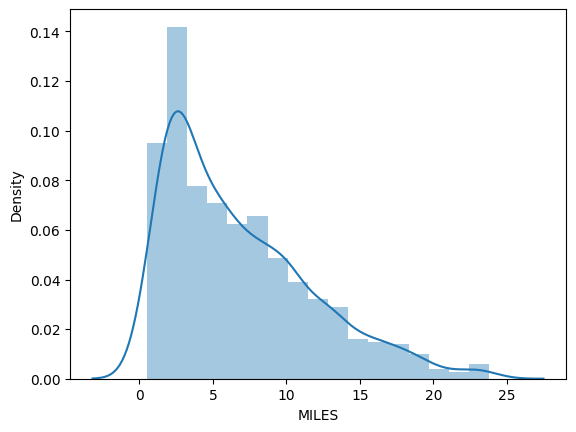

In [48]:
sns.distplot(df['MILES'][df['MILES'] < 25])

<h3>Ans.6 - People booked the most Uber rides for 1 to 15 Miles distance.</h3>

<h2>Conclusion :</h2>

<h3>People booked the most Uber rides in Buisness Category. <br>
People booked the most Uber rides for meeting or not defined purpose. <br>
People booked the most Uber rides in afternoon and evening time. <br>
People booked the most Uber rides in month of August, October and December. <br>
People booked the most Uber rides on tuesday, friday and sunday. <br>
People booked the most Uber rides for the distance between 1 to 15 miles. </h3>